# Taken from
https://github.com/Thumar/CNN_MNIST_.9953 <br>
https://github.com/Thumar/CNN_MNIST_.9953 https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-themnist-dataset-2c34426416c8 <br>


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (eval_data, eval_labels) = mnist.load_data()

In [3]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
eval_data = eval_data.reshape(eval_data.shape[0], 28, 28, 1) 

num_class = 10

train_labels = tf.keras.utils.to_categorical(train_labels, num_class)
eval_labels = tf.keras.utils.to_categorical(eval_labels, num_class)

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1), padding='same'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, name="output"))
    
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
output (Dense)               (None, 10)                31370     
Total params: 68,938
Trainable params: 68,938
Non-trainable params: 0
____________________________________________________

In [5]:
model.fit(train_data, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2643 - accuracy: 0.9526
Epoch 2/2
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0638 - accuracy: 0.9806


In [6]:
model.evaluate(eval_data, eval_labels, verbose=2)

313/313 - 3s - loss: 0.0622 - accuracy: 0.9789


[0.06218309327960014, 0.9789000153541565]

In [7]:
def visualize_sample(eval):
	#make a list of the layers we care about (convolution and pooling)
	layer_outputs = [layer.output for layer in model.layers[:4]]
	#create a custom model that outputs the values of those layers
	activation_model = tf.keras.Model(inputs=model.input,outputs=layer_outputs)
	#predict on a 7 to fill those layers for drawing
	activations = activation_model.predict(eval)

	layer_names = []
	for layer in model.layers[:]:
		layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

	images_per_row = 16
	for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
		n_features = layer_activation.shape[-1] # Number of features in the feature map
		size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
		n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
		display_grid = np.zeros((size * n_cols, images_per_row * size))
		for col in range(n_cols): # Tiles each filter into a big horizontal grid
			for row in range(images_per_row):
				channel_image = layer_activation[0,
												 :, :,
												 col * images_per_row + row]
				channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
				channel_image /= channel_image.std()
				channel_image *= 64
				channel_image += 128
				channel_image = np.clip(channel_image, 0, 255).astype('uint8')
				display_grid[col * size : (col + 1) * size, # Displays the grid
							 row * size : (row + 1) * size] = channel_image
		scale = 1. / size
		plt.figure(figsize=(scale * display_grid.shape[1],
							scale * display_grid.shape[0]))
		plt.title(layer_name)
		plt.grid(False)
		plt.imshow(display_grid, aspect='auto', cmap='viridis')

C:\Users\sbing\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


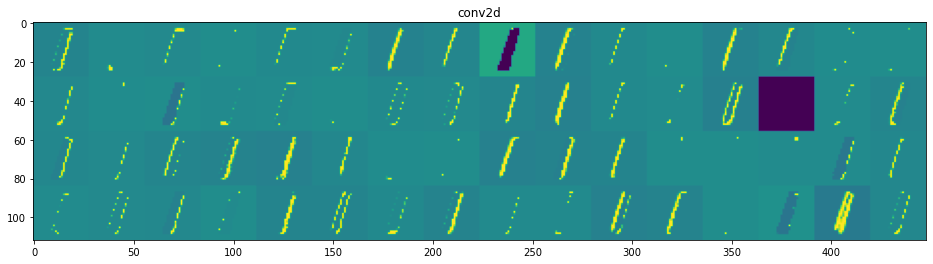

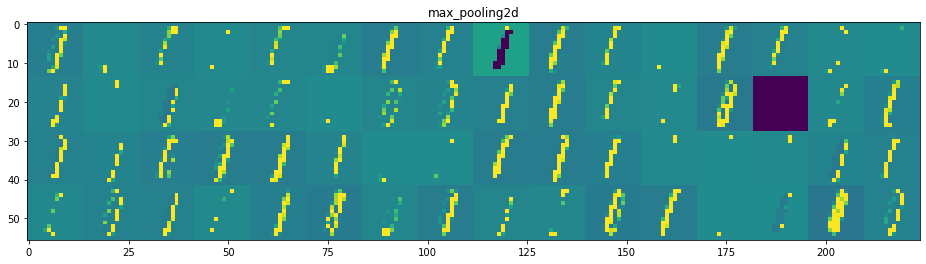

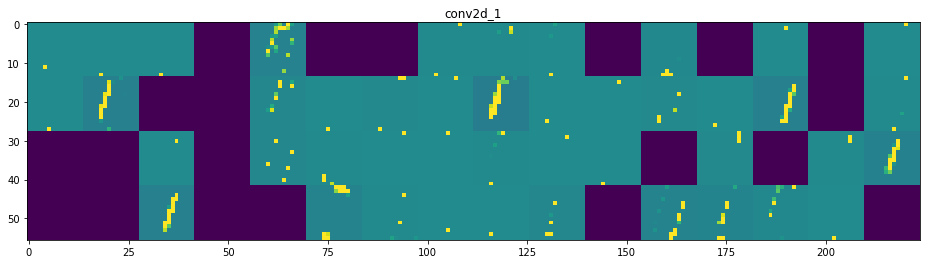

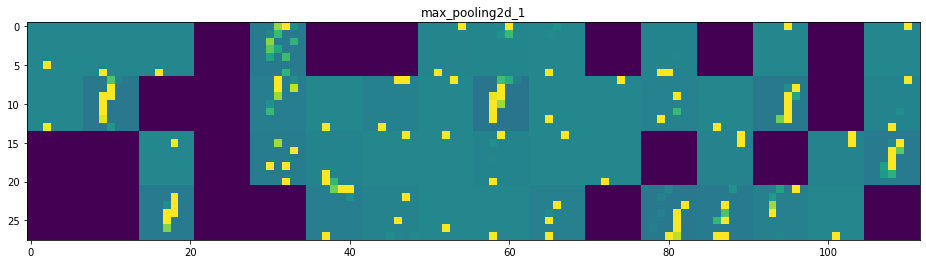

In [8]:
visualize_sample(eval_data[2:])

C:\Users\sbing\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


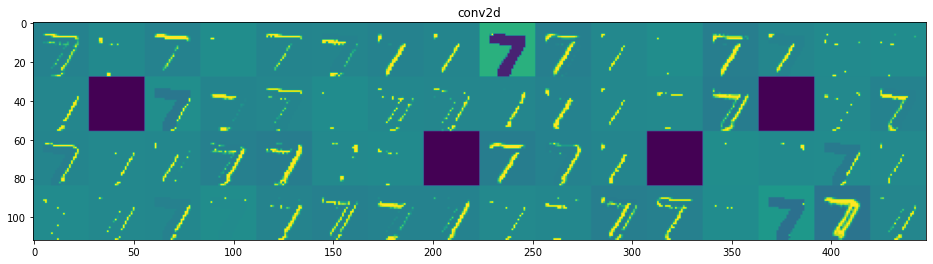

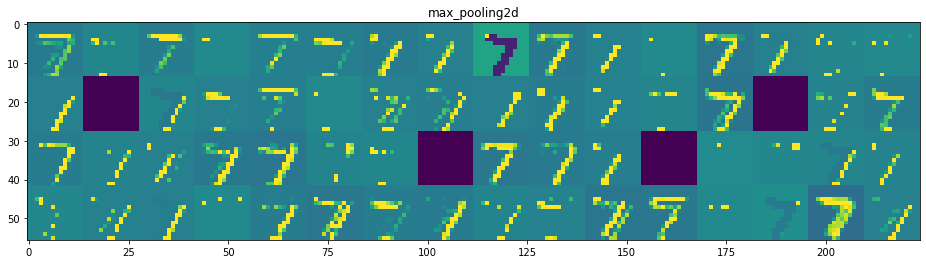

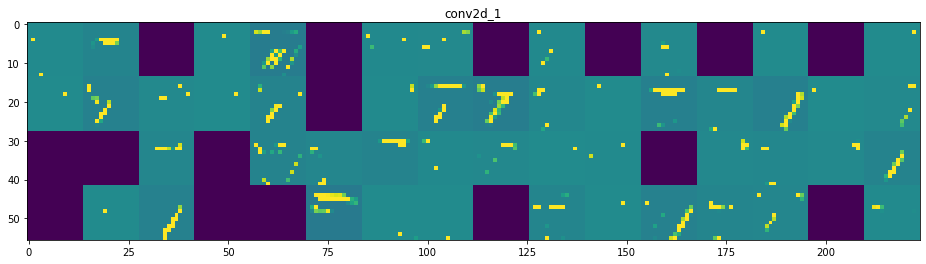

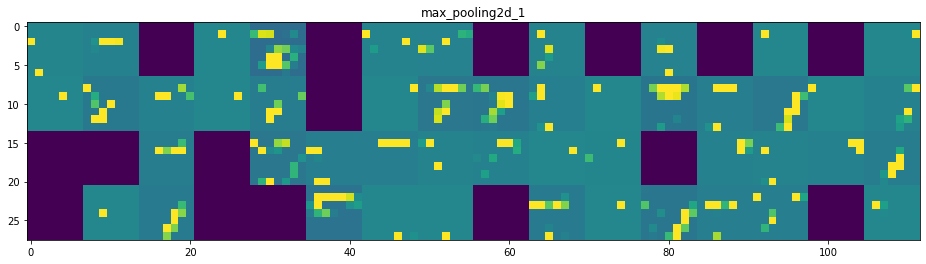

In [9]:
visualize_sample(eval_data[0:])

C:\Users\sbing\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


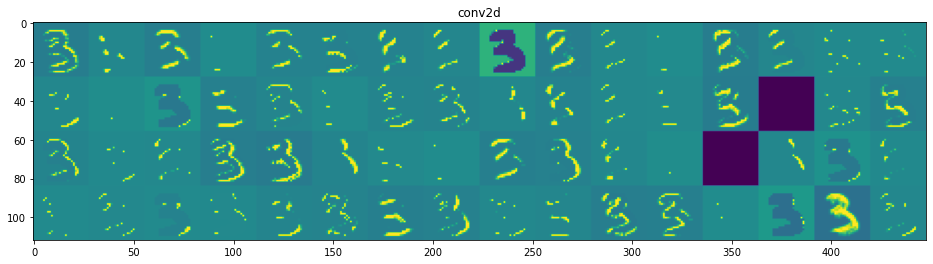

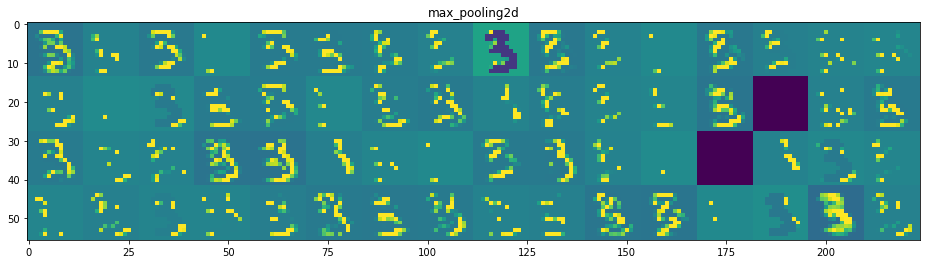

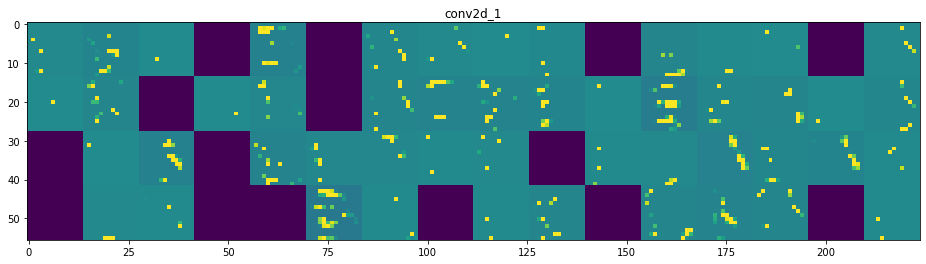

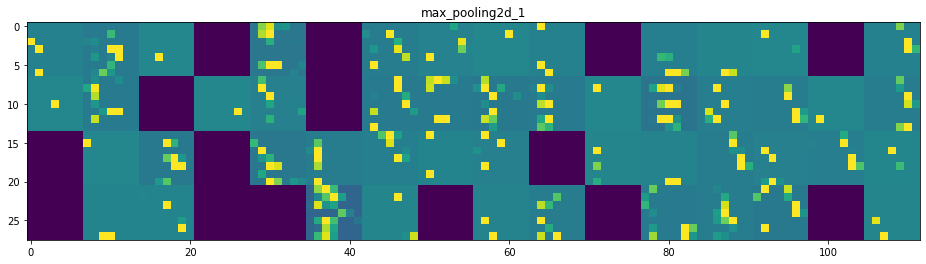

In [10]:
visualize_sample(eval_data[32:])

C:\Users\sbing\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


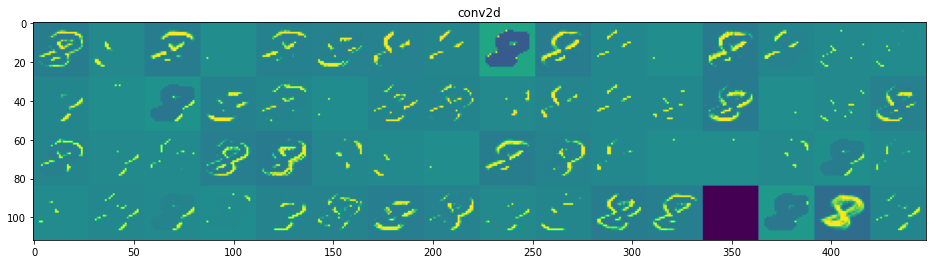

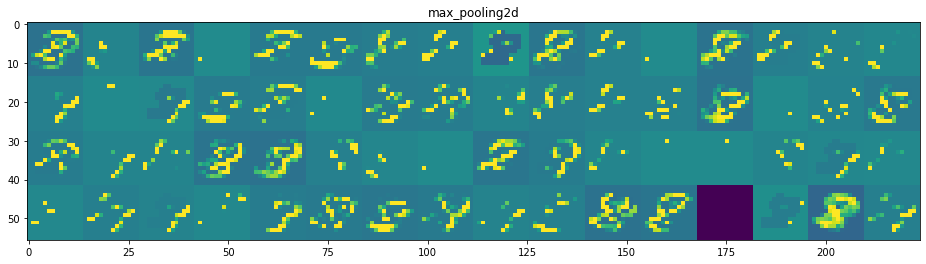

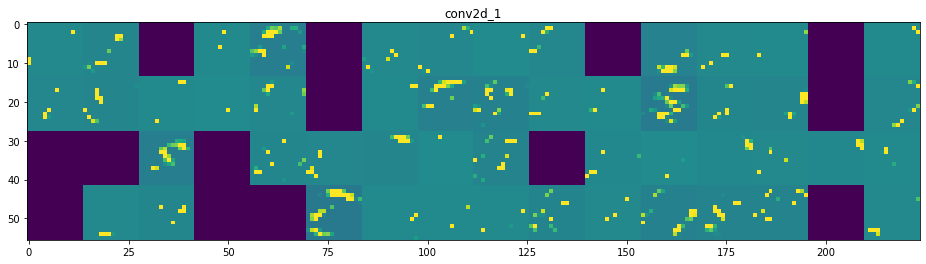

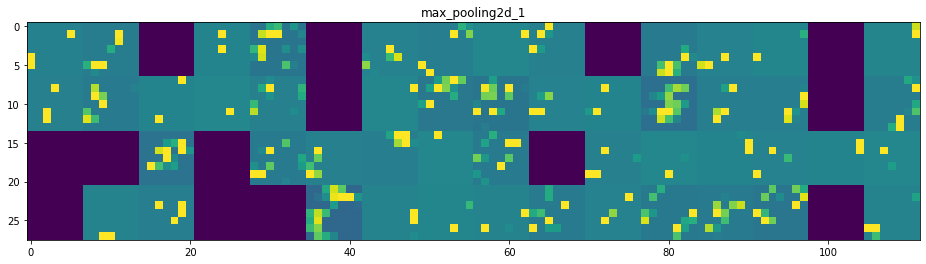

In [11]:
visualize_sample(eval_data[61:]) 

### Results - Homework 9.1

## Chosen Layers:
conv2d (Conv2D)              Shape: (None, 28, 28, 64)        640<br>       
max_pooling2d (MaxPooling2D) Shape: (None, 14, 14, 64)        0<br>         
conv2d_1 (Conv2D)            Shape: (None, 14, 14, 64)        36928<br>     
max_pooling2d_1 (MaxPooling2 Shape: (None, 7, 7, 64)          0<br>         
flatten (Flatten)            Shape: (None, 3136)              0<br>         

I increased number of layer iterations to 64 - I thought that it as going to give me 98% accuracy</br>
but t did not.</br>
I tried adding normalization layers, but they did not add much.</br>

I ran digits 1, 7, 3, 8; I chose 3 and 8 because they could easily be mistaken for one another</br>


_________________________________________________________________